In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold

In [2]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [3]:
all_image = []
all_label = []
def vol_(path):
    for index,folder in enumerate(os.listdir(path)):
        print(index,folder)
        image = []
        for row in os.listdir(path+'\\'+folder):
            pat_path = path+'\\'+folder+'\\'+row
            all_image.append(pat_path)
            all_label.append(index)
        
    return 0

In [4]:
image_train_set = vol_(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume\Train')

0 00_5
1 06_10
2 11_16
3 17_28


In [5]:
def import_maps(path,label):
    #print(path[0])
    images = []
    for index,item in enumerate(path):
        for name in enumerate(os.listdir(item)):
            #print(name[1])
            folder = os.path.join(item, name[1])
            #print('folder: ',folder)
            img = cv2.imread(folder)
            #print(img.shape)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img1 = cv2.resize(img, (196, 196))
                img = np.dstack((img1,img1,img1))
            if img is not None:
           #     img = (img-np.mean(img))/np.std(img)
                images.append((np.array(img),label[index]))
    return images

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(196,196,3),filters=64,kernel_size=(5,5),padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))



model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
#model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten(name='flatten'))
#model.add(Dense(16, activation='relu', name='fc1'))
model.add(Dense(4, activation='sigmoid'))

In [ ]:
images_ = all_image
labels_ = all_label
hist = []
test_score_l = []
for j, (train_idx, test_idx) in enumerate(folds.split(images_, labels_)):
    X_train = np.array(images_)[train_idx]
    y_train = np.array(labels_)[train_idx]
    X_test = np.array(images_)[test_idx]
    y_test = np.array(labels_)[test_idx]
    
    train_image = import_maps(X_train,y_train)
    test_image = import_maps(X_test,y_test)
    
    train_images_all = [i[0] for i in train_image]
    train_images_array = np.array(train_images_all)
    #train_images_array=np.expand_dims(train_images_array,axis=3)
    train_image_label = [i[1] for i in train_image]
    train_image_label = np.array(train_image_label)
    
    test_images_all = [i[0] for i in test_image]
    test_images_array = np.array(test_images_all)
    #test_images_array=np.expand_dims(test_images_array,axis=3)
    test_image_label = [i[1] for i in test_image]
    test_image_label = np.array(test_image_label)
    
    enc = OneHotEncoder(handle_unknown='ignore')
    train_label_enc = enc.fit_transform(train_image_label.reshape(-1, 1)).toarray()
    #val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
    test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()
    
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy','AUC'])
    history = model.fit(train_images_array, train_label_enc, batch_size=16, epochs=15, verbose=1,shuffle=True)
    hist.append(history)
    print('#'*120)
    print('Fold ended')
    print('#'*120)
    print('Test Score')
    test_score = model.evaluate(test_images_array, test_label_enc, batch_size=16, verbose = 1)
    print('#'*120)
    test_score_l.append(test_score)
    tf.keras.backend.clear_session()

Epoch 1/15
960/960 [==============================] - 21s 21ms/step - loss: 0.8901 - accuracy: 0.9228 - auc: 0.96653s - loss: 0.8873 - accu - ETA: 2s - loss: 0.8870 - accuracy:  - ETA:  - ETA: 0s - loss: 0.8883 - accuracy: 0.9234 - auc - ETA: 0s - loss: 0.8893 - accuracy: 0.9229 -
Epoch 2/15
960/960 [==============================] - 20s 21ms/step - loss: 0.8703 - accuracy: 0.9317 - auc: 0.9691: 20s - loss: 0.8871 - accuracy - ETA: 18s - loss: 0.8722 - accuracy: 0.9327 - auc: - ETA: 18s - los - ETA: 16s - loss: 0.8824 - accuracy: 0.9265 -  - ETA: 15s - loss: 0.8785 - accuracy: 0.9275 - auc: 0.968 - ETA: 15s - loss: 0.8787 - ac - ETA: 13s - loss: 0.8755 - accuracy: 0.9302 - ETA: 12s - loss: 0.8762 - accuracy: 0.9303 - auc: 0.968 - ETA: 12s - loss: 0.8758 - accuracy: 0.9305 - - ETA: 11s - loss: 0.8773 - accuracy: 0.9298 - auc: 0.9 - ETA: 11s - loss: 0.8753 - accuracy: 0.9 - ETA: 8s - loss: - ETA: 5s - loss: 0.8686 - accuracy: 0.9323 - auc: 0.96 - ETA: 5s - loss: 0.8688 - accuracy: 0.93 -

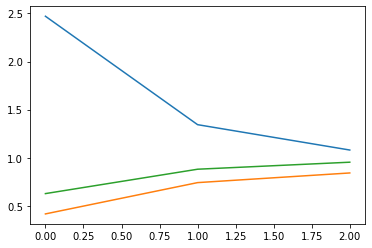

In [11]:
plt.plot(test_score_l)

In [12]:
test_score_l

[[2.470787286758423, 0.41555556654930115, 0.6267337203025818],
 [1.3434394598007202, 0.7410112619400024, 0.8802769780158997],
 [1.0797243118286133, 0.8414364457130432, 0.9532791972160339]]

In [34]:
(74+84)/2

79.0

In [18]:
history.history['loss']

[1.0571595430374146,
 1.0335742235183716,
 1.0118024349212646,
 0.985831081867218,
 0.9746829867362976,
 0.951061487197876,
 0.9395124316215515,
 0.9262233972549438,
 0.9091644883155823,
 0.8996343612670898,
 0.888978123664856,
 0.8783875107765198,
 0.8640640377998352,
 0.8602203726768494,
 0.8475135564804077]

In [21]:
hist[0].history['accuracy']

[0.311429500579834,
 0.3648974299430847,
 0.40781503915786743,
 0.45418429374694824,
 0.4846629798412323,
 0.5254966020584106,
 0.5510257482528687,
 0.5831976532936096,
 0.6091175675392151,
 0.6381634473800659,
 0.6553565859794617,
 0.6819928288459778,
 0.6965157985687256,
 0.7234125733375549,
 0.7394334077835083]

In [22]:
hist[1].history['accuracy']

[0.7089430689811707,
 0.7310569286346436,
 0.7500487565994263,
 0.7627967596054077,
 0.7754146456718445,
 0.7871219515800476,
 0.8072845339775085,
 0.8243902325630188,
 0.8330406546592712,
 0.8338862061500549,
 0.8477398157119751,
 0.8606829047203064,
 0.865821123123169,
 0.875382125377655,
 0.8813658356666565]

In [24]:
y_predict = model.predict(test_images_array)

In [25]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [26]:
confusion_matrix(test_image_label,y_predict_bool)

array([[435,   0,   0,   0],
       [  0, 150,   0,   0],
       [  0,   0, 600,   0],
       [  0,   0,   2, 598]], dtype=int64)

In [27]:
precision_score(test_image_label,y_predict_bool,average='weighted')

0.9988832742399285

In [32]:
fpr,tpr,thresholds = roc_curve(test_image_label,y_predict_bool,pos_label=3)
print(auc(fpr,tpr))

0.99915611814346
